In [52]:
# Imports definition
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [53]:
train_var = {
    "y1": [1, 1, 0, 1, 2, 1, 2, 0],
    "y2": [1, 1, 2, 2, 0, 1, 0, 2],
    "y3": [0, 5, 4, 3, 7, 1, 2, 9],
    "output": [1, 3, 2, 0, 6, 4, 5, 7]
}

test_var = {
    "y1": [2, 0],
    "y2": [0, 2],
    "y3": [0, 1],
    "output": [2, 4]
}

df_train = pd.DataFrame.from_dict(train_var)
df_test = pd.DataFrame.from_dict(test_var)

In [54]:
# Performs an equal-depth descritization on y3 and applies function to output target
for index, row in df_train.iterrows():

    # If y3 is lower or equal to 4, then we use 0, else we use 1
    # This method assures that we have an equal number of 0's and 1's in y3
    row["y3"] = 1 if row["y3"] >= 4 else 0

    # Applies function to output column
    row["output"] = 1 if row["output"] >= 4 else 0

# Performs an equal-depth descritization on y3 and applies function to output target
for index, row in df_test.iterrows():

    # If y3 is lower or equal to 4, then we use 0, else we use 1
    # This method assures that we have an equal number of 0's and 1's in y3
    row["y3"] = 1 if row["y3"] > 4 else 0

    # Applies function to output column
    row["output"] = 1 if row["output"] >= 4 else 0

In [55]:
# Gathers vars
X_train = df_train.drop("output", axis=1).to_numpy()
y_train = df_train["output"].to_numpy()

X_test = df_test.drop("output", axis=1).to_numpy()
y_test = df_test["output"].to_numpy()

In [56]:
# Creates a decision tree and trains it
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

# Predicts values and calculates accuracy
accuracy = tree.score(X_test, y_test)
print(accuracy)

0.0


[Text(200.88000000000002, 195.696, 'X[0] <= 1.5\ngini = 0.5\nsamples = 8\nvalue = [4, 4]'),
 Text(133.92000000000002, 152.208, 'X[0] <= 0.5\ngini = 0.444\nsamples = 6\nvalue = [4, 2]'),
 Text(66.96000000000001, 108.72, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(200.88000000000002, 108.72, 'X[1] <= 1.5\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(133.92000000000002, 65.232, 'X[2] <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(66.96000000000001, 21.744, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(200.88000000000002, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(267.84000000000003, 65.232, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(267.84000000000003, 152.208, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]')]

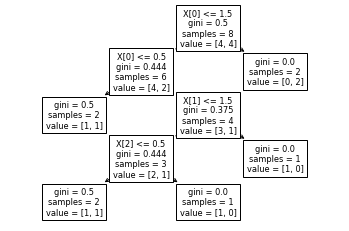

In [57]:
# Used to visualize classifications
plot_tree(tree)
